In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd
%matplotlib inline

from useful_functions.plotter import plot

idx = pd.IndexSlice

In [2]:
populations = pd.read_csv('../data/US_States/TrackTheRecovery/GeoIDs - State.csv', index_col='statefips')
case_data = pd.read_csv('../DL/data/states_unstacked.csv')
case_data = case_data[case_data['date'] <= '2021-02-25']
case_data = case_data.rename(columns={'Unnamed: 0': "statefips"})
case_data = case_data.sort_values(['date','statefips'])
case_data = case_data.reset_index(drop=True).set_index(['statefips','date']) # Let's see how this works
iso_index = pd.read_csv('../data/US_States/cleaned_data/mobility_pca_only.csv')
iso_index = iso_index.sort_values(['Date', 'statefips'])
iso_index = iso_index.reset_index(drop=True).set_index(['statefips','Date'])

state_ids = populations.index.values
dates = iso_index.index.get_level_values(1).unique().values
dates.sort()

In [3]:
iso_index

,,Unnamed: 0,statename,shadow_index_normalized
statefips,Date,,,
1,2020-02-01,0,Alabama,3.470011
2,2020-02-01,1,Alaska,5.633745
4,2020-02-01,2,Arizona,3.786875
5,2020-02-01,3,Arkansas,2.984032
6,2020-02-01,4,California,3.781656
...,...,...,...,...
51,2021-02-25,19936,Virginia,54.487582
53,2021-02-25,19937,Washington,33.655507
54,2021-02-25,19938,West Virginia,40.557192


In [4]:
case_data

,,Stringency,positiveIncrease,deathIncrease,hospitalizedIncrease,totalTestsPeopleViralIncrease
statefips,date,,,,,
1,2020-02-01,0.00,0.0,0.0,0.0,0.0
2,2020-02-01,5.56,0.0,0.0,0.0,0.0
4,2020-02-01,5.56,0.0,0.0,0.0,0.0
5,2020-02-01,0.00,0.0,0.0,0.0,0.0
6,2020-02-01,2.78,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
51,2021-02-25,62.04,2036.0,156.0,73.0,0.0
53,2021-02-25,65.74,872.0,31.0,51.0,0.0
54,2021-02-25,49.07,431.0,5.0,0.0,0.0


In [24]:
adherence = iso_index['shadow_index_normalized'] - case_data['Stringency']

In [25]:
mean_adherence = adherence.groupby('statefips').mean()
mean_adherence = mean_adherence.rename('mean_adherence')

In [32]:
usa = gpd.read_file('../data/US_States/shapefile/states.shp')
usa = usa.set_index(['STATE_FIPS'])
usa.index = usa.index.rename('statefips').astype(int)

In [34]:
usa = usa.join(mean_adherence)

(25.0, 51.0)

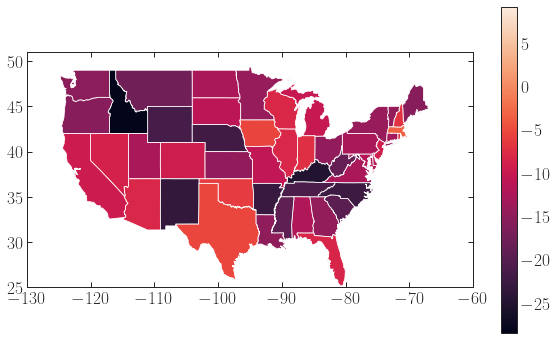

In [42]:
fig, ax = plot(figsize=(10,6))
usa.plot('mean_adherence', legend=True, ax=ax)
plt.xlim(-130, -60)
plt.ylim(25,51)

In [20]:
mean_adherence

# The more negative this is, the lower our index is relative to government stringency
# This isn't all adherence really, since it also has to do with economic recovery

statefips
1    -12.147675
2     -9.905668
4     -8.138586
5    -22.769690
6     -9.517697
8     -9.395829
9    -12.921421
10   -12.034249
11     9.176626
12    -8.284502
13   -14.576081
15   -15.396006
16   -28.434148
17    -8.078894
18    -7.183049
19    -5.408090
20   -14.725248
21   -24.998472
22   -14.793609
23   -15.645465
24   -11.587495
25    -3.207133
26    -9.982102
27   -14.253523
28   -19.213615
29   -10.641400
30   -17.424088
31   -21.884864
32    -8.618357
33    -6.873723
34    -9.143398
35   -23.380379
36   -14.054420
37   -22.511449
38   -12.455662
39   -14.678305
40    -6.217601
41   -15.616513
42   -12.537134
44    -7.647941
45   -19.608929
46   -11.044310
47   -21.017715
48    -5.351702
49   -12.664535
50   -14.420092
51   -12.662307
53   -15.221816
54   -18.535110
55    -7.977802
56   -21.417873
dtype: float64